In [49]:
import numpy as np

In [75]:
import pandas as pd

In [76]:
import pprint

In [51]:
print('Hello World!')

Hello World!


In [52]:
import random


In [78]:
def print_r(obj, indent=0) :
    try :
        obj.__dict__
        print(str(obj.__class__)), '{'
        attrs = vars(obj)
        for key, val in attrs.items() :
            print('\t'*(indent+1) + str(key) + ':'),
            print_r(val, indent+1)
        print('\t'*indent + '}')
        
    except AttributeError :
        if isinstance(obj, dict) :
            print('')
            for k, v in obj.items() :
                print('\t'*(indent+1), k,':'),
                print_r(v, indent+1)
                
        elif isinstance(obj, list) :
            print('')
            index = 0
            for v in obj :
                print('\t'*(indent+1), index,':'),
                print_r(v, indent+1)
                index +=1
        else :
            print(str(obj))

In [53]:
POPULATION_SIZE = 4
MUTATION_RATE = 0.1
SIZE = 5

In [54]:
#염색체 클래스 정의
class Chromosome:
  def __init__(self, g=[]):
    self.genes = g.copy()
    self.fitness = 0
    if self.genes.__len__() == 0:
      i = 0
      while i < SIZE:
        if random.random() > 0.5 : self.genes.append(1)
        else: self.genes.append(0)
        i += 1



  def cal_fitness(self):
    self.fitness = 0
    value = 0
    for i in range(SIZE):
      value += self.genes[i]*pow(2,SIZE-i-1)
    self.fitness = value
    return self.fitness

  def __str__(self):
    return self.genes.__str__()


In [55]:
def select(pop):
  max_value = sum([c.cal_fitness() for c in population])
  pick = random.uniform(0, max_value)
  current = 0

  for c in pop:
    current += c.cal_fitness()
    if current > pick:
      return c

In [66]:
def mutate(c):
  for i in range(SIZE):
    if random.random() < MUTATION_RATE:
      if random.random() < 0.5:
        c.genes[i] = 1
      else:
        c.genes[i] = 0

In [62]:
def crossover(pop):
  father = select(pop)
  mother = select(pop)
  index = random.randint(1, SIZE-2)
  child1 = father.genes[:index] + mother.genes[index:]
  child2 = mother.genes[:index] + mother.genes[index:]
  return (child1, child2)

In [83]:
population = []
i = 0

while i < POPULATION_SIZE:
  population.append(Chromosome())
  i += 1

count = 0
#population.sort(key = lambda x: x.cal_fitness, reverse = True)
print('세대 번호 = ', count)
print(population)
count = 1

while population[0].cal_fitness()< 31:
  new_pop = []

  for _ in range(POPULATION_SIZE//2):
    c1, c2 = crossover(population)
    new_pop.append(Chromosome(c1))
    new_pop.append(Chromosome(c2))

  population = new_pop.copy()

  for c in population: mutate(c)

  population.sort(key= lambda x : x.cal_fitness(), reverse=True)
  print('세대번호 = ', count)
  for i in range(POPULATION_SIZE):
    print(population[i])
  count += 1
  if count > 100: break

세대 번호 =  0
[<__main__.Chromosome object at 0x7f7169b47ad0>, <__main__.Chromosome object at 0x7f7169b47a90>, <__main__.Chromosome object at 0x7f7169b47850>, <__main__.Chromosome object at 0x7f7169b473d0>]
세대번호 =  1
[1, 1, 1, 1, 0]
[1, 1, 1, 1, 0]
[1, 1, 0, 1, 0]
[0, 0, 0, 1, 0]
세대번호 =  2
[1, 1, 1, 1, 0]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
세대번호 =  3
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
세대번호 =  4
[1, 1, 0, 1, 1]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
[1, 1, 0, 1, 0]
세대번호 =  5
[1, 1, 0, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 0, 1, 1]
세대번호 =  6
[1, 1, 1, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 0, 1, 1]
[1, 1, 0, 0, 1]


In [95]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

<function matplotlib.pyplot.show>

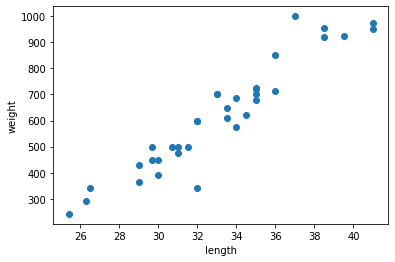

In [96]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [97]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

<function matplotlib.pyplot.show>

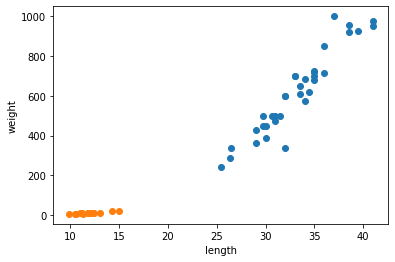

In [98]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [99]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [100]:
fish_data = [[l,w] for l, w in zip(length, weight)]

In [110]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [102]:
fish_target = [1]*35 + [0]*14

In [111]:
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [105]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [112]:
kn.predict([[30,600]])


array([1])

In [113]:
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [114]:
print(35/49)

0.7142857142857143
